In [1]:
from BBBacktesterModule import *
spread = 1.4
pips = 0.0001

## Define a tester object

In [2]:
tester = BBBacktester("AUD_NZD_2016_2021.csv", "c", "2016-01-01", "2019-12-31", spread*pips/2) 
        #mult by 2 for a 'round trip', multiply by pips
    

## Optimize parameters and plot best strategy backtest

SIMPLE CONTRARIAN STRATEGY | INSTRUMENT = c | FREQ = 165 | SMA = 10 | DEV = 1.444444
----------------------------------------------------------------------------------------------------


PERFORMANCE MEASURES:


Multiple (Strategy):         4.645267
Multiple (Buy-and-Hold):     0.973214
--------------------------------------
Out-/Underperformance:       3.672053


CAGR:                        0.470416
Annualized Mean:             0.385831
Annualized Std:              0.485017
Sharpe Ratio:                0.795499
Sortino Ratio:               1.116134
Maximum Drawdown:            0.346220
Calmar Ratio:                1.358721
Max Drawdown Duration:       490 Days
Kelly Criterion:             2.142558


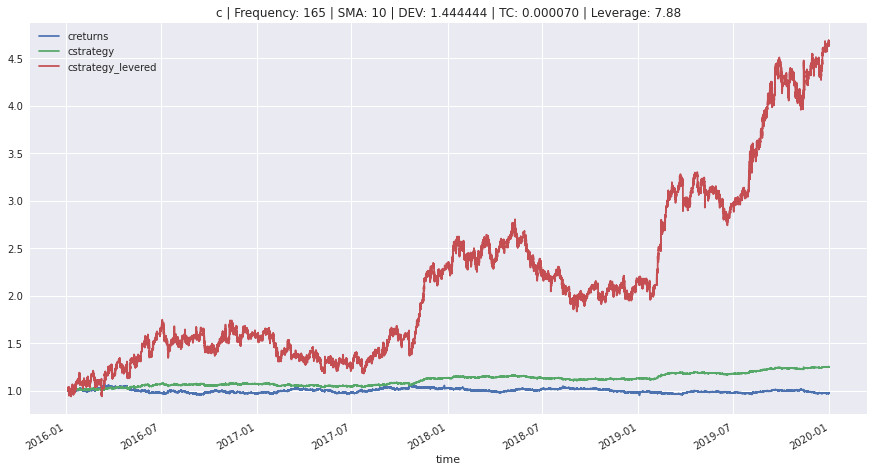

In [3]:
#tester.optimize_strategy((5,400,40),(10,150,40),(1,2,10), metric = "Multiple") #quick
tester.test_strategy(freq=165, sma=10, dev = 1.444444)
half_kelly = (tester.calculate_kelly_criterion(tester.results.strategy))/2
tester.add_leverage(leverage = half_kelly, sl = -0.35)
tester.plot_results(leverage = True)

## Test optimal strategy on forward data

SIMPLE CONTRARIAN STRATEGY | INSTRUMENT = c | FREQ = 165 | SMA = 10 | DEV = 1.444444
----------------------------------------------------------------------------------------------------


PERFORMANCE MEASURES:


Multiple (Strategy):         1.011742
Multiple (Buy-and-Hold):     1.024742
--------------------------------------
Out-/Underperformance:       -0.013000


CAGR:                        0.005898
Annualized Mean:             0.005872
Annualized Std:              0.064002
Sharpe Ratio:                0.091742
Sortino Ratio:               0.130357
Maximum Drawdown:            0.074966
Calmar Ratio:                0.078682
Max Drawdown Duration:       315 Days
Kelly Criterion:             1.933187


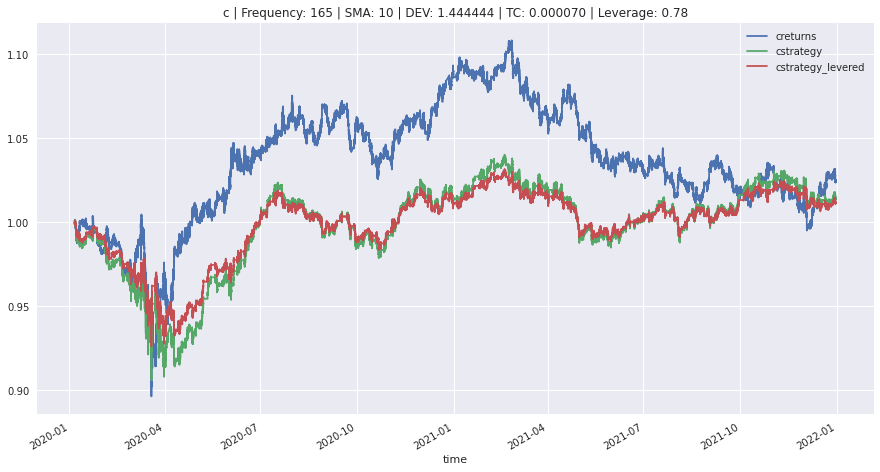

In [5]:
#best = tester.results_overview.nlargest(1,columns='Performance')

forward = BBBacktester("AUD_CAD_2016_2021.csv", "c", "2020-01-01", "2021-12-31", spread*pips/2) #mult by 2 for a 'round trip', multiply by pips
#forward.test_strategy(freq=best.Freq.values[0], sma=best.Sma.values[0], dev = best.Dev.values[0])
forward.test_strategy(freq=165, sma=10, dev = 1.444444)

fw_half_kelly = (forward.calculate_kelly_criterion(forward.results.strategy))/2
forward.add_leverage(leverage = fw_half_kelly, sl = -0.35)
forward.plot_results(leverage=True)